In [1]:
import numpy as np
import scipy as sp
import GPy
import kernels
import functions
from matplotlib import pyplot as plt

# Sequential Bayesian quadrature

In this notebook we will cover the approach of Sequential Bayesian Quadrature (SBQ) as an extension of finding the optimal node arrangement for Gaussian process quadrature. Therefore, we will use the implemented function that calculates SBQ in python.

# First experiment

Starting with $NoN=2$ we will extend these existing points with $5$ new nodes calculated by SBQ. Initialising in the start:

In [2]:
kern = kernels.PolynomialBasis(input_dim=1, weight=0.9)
existing_NoN = 2
restarts = 10

We will restart the optimization in every step 10 times. The first iteration uses the function which takes the optimal nodes found in a previous notebook and after that we will use the results from the first iteration to get new nodes using the second SBQ_X function.

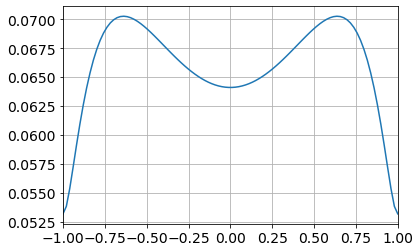

 C:\Users\Manuel Kleinschmager\PycharmProjects\GaussianProcessQuadrature\functions.py:454: IntegrationWarning:The integral is probably divergent, or slowly convergent.


In [3]:
mu1 = functions.SBQ(kernel=kern, NoN_ex=existing_NoN, opt_restarts=restarts, return_plot=True)  #3 nodes

[-0.63833017  0.63835734  0.99901326]


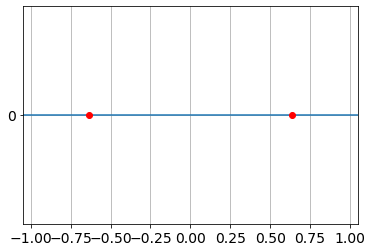

In [4]:
print(mu1)

plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu1[0:existing_NoN], 1*np.zeros(len(mu1) - 1), 'ro')
#plt.plot(mu1[existing_NoN], 1, 'bo')
plt.show()

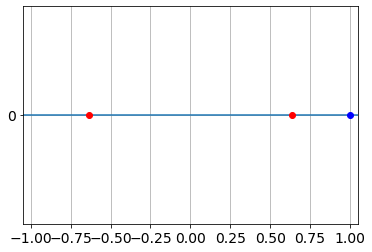

In [5]:
plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu1[0:existing_NoN], 1*np.zeros(len(mu1) - 1), 'ro')
plt.plot(mu1[existing_NoN], 0, 'bo')
plt.show()

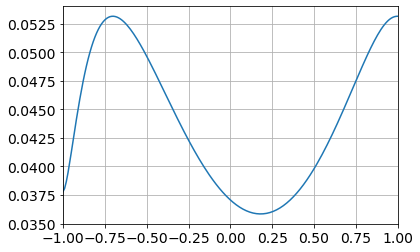

 C:\Users\Manuel Kleinschmager\PycharmProjects\GaussianProcessQuadrature\functions.py:529: IntegrationWarning:The integral is probably divergent, or slowly convergent.


In [6]:
mu2 = functions.SBQ_X(kernel=kern, X=mu1, opt_restarts=restarts, return_plot=True) # 4 nodes

[-0.63833017  0.63835734  0.99901326  0.18043005]


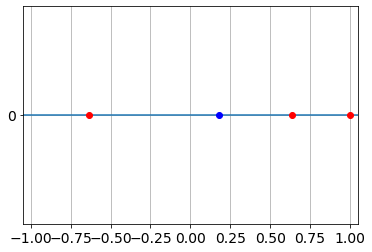

In [7]:
print(mu2)

plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu2[0:(existing_NoN + 1)], 1*np.zeros(len(mu2) - 1), 'ro')
plt.plot(mu2[(existing_NoN + 1)], 0, 'bo')
plt.show()

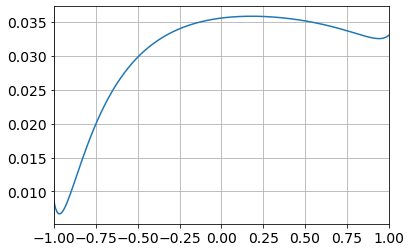

 C:\Users\Manuel Kleinschmager\PycharmProjects\GaussianProcessQuadrature\functions.py:529: IntegrationWarning:The integral is probably divergent, or slowly convergent.


In [8]:
mu3 = functions.SBQ_X(kernel=kern, X=mu2, opt_restarts=restarts, return_plot=True) # 5 nodes

[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459]


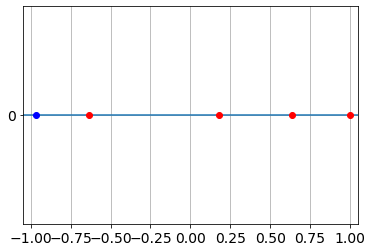

In [9]:
print(mu3)

plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu3[0:(existing_NoN + 2)], 1*np.zeros(len(mu3) - 1), 'ro')
plt.plot(mu3[(existing_NoN + 2)], 0, 'bo')
plt.show()

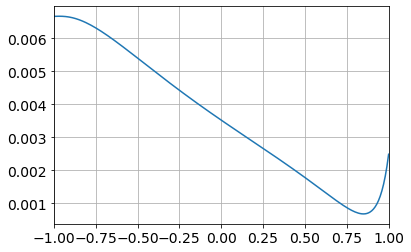

 C:\Users\Manuel Kleinschmager\PycharmProjects\GaussianProcessQuadrature\functions.py:529: IntegrationWarning:The integral is probably divergent, or slowly convergent.


In [10]:
mu4 = functions.SBQ_X(kernel=kern, X=mu3, opt_restarts=restarts, return_plot=True) # 6 nodes

[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459  0.8497004 ]


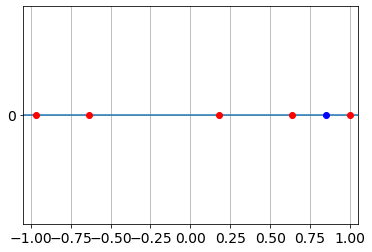

In [11]:
print(mu4)

plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu4[0:(existing_NoN + 3)], 1*np.zeros(len(mu4) - 1), 'ro')
plt.plot(mu4[(existing_NoN + 3)], 0, 'bo')
plt.show()

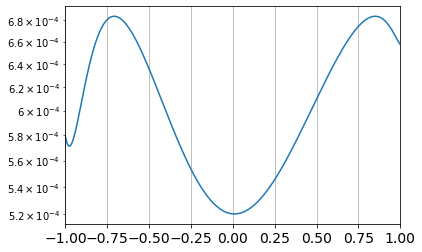

In [12]:
mu5 = functions.SBQ_X(kernel=kern, X=mu4, opt_restarts=restarts, return_plot=True) # 7 nodes

[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459  0.8497004
  0.00918942]


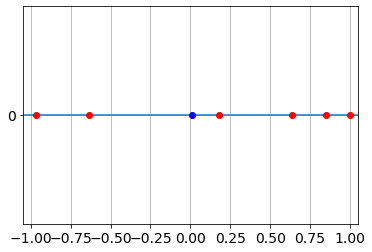

In [13]:
print(mu5)

plt.figure()
plt.grid()
plt.xlim(-1.05, 1.05)
plt.yticks(np.array([0]), fontsize=14)
plt.xticks(fontsize=14)
plt.hlines(0, -1.05, 1.05)
plt.plot(mu5[0:(existing_NoN + 4)], 1*np.zeros(len(mu5) - 1), 'ro')
plt.plot(mu5[(existing_NoN + 4)], 0, 'bo')
plt.show()

In [14]:
print(mu1)
print(mu2)
print(mu3)
print(mu4)
print(mu5)

[-0.63833017  0.63835734  0.99901326]
[-0.63833017  0.63835734  0.99901326  0.18043005]
[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459]
[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459  0.8497004 ]
[-0.63833017  0.63835734  0.99901326  0.18043005 -0.96740459  0.8497004
  0.00918942]


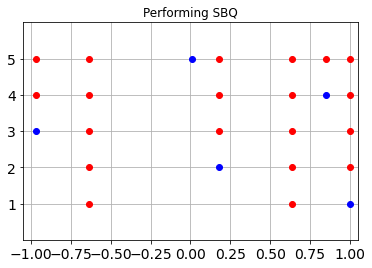

In [15]:
plt.figure()
plt.grid()
plt.ylim(0, 6)
plt.title('Performing SBQ')
plt.xticks(fontsize=14)
plt.yticks(np.array([1, 2, 3, 4, 5]), fontsize=14)
plt.xlim(-1.05,1.05)

#3 nodes
plt.plot(mu1[0:2], 1*np.ones(len(mu1) - 1), 'ro')
plt.plot(mu1[2], 1, 'bo')

#4 nodes
plt.plot(mu2[0:3], 2*np.ones(len(mu2) - 1), 'ro')
plt.plot(mu2[3], 2, 'bo')

#5 nodes
plt.plot(mu3[0:4], 3*np.ones(len(mu3) - 1), 'ro')
plt.plot(mu3[4], 3, 'bo')

#6 nodes
plt.plot(mu4[0:5], 4*np.ones(len(mu4) - 1), 'ro')
plt.plot(mu4[5], 4, 'bo')

#7 nodes
plt.plot(mu5[0:6], 5*np.ones(len(mu5) - 1), 'ro')
plt.plot(mu5[6], 5, 'bo')

plt.show()

# Second experiment

This time we will start with $NoN=7$ and continue finding some nodes using SBQ.

In [32]:
kern = kernels.PolynomialBasis(input_dim=1, weight=0.9)
existing_NoN = 5
restarts = 1

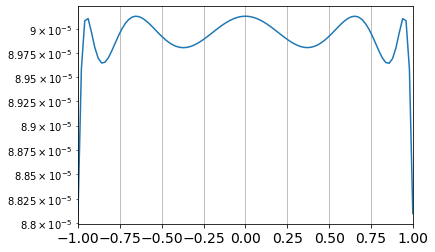

In [33]:
mu1 = functions.SBQ(kernel=kern, NoN_ex=existing_NoN, opt_restarts=restarts, return_plot=True)  #3 nodes

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01]


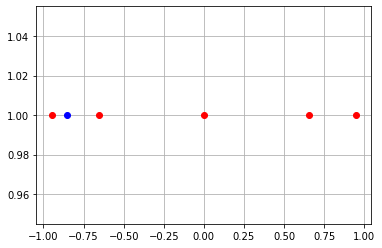

In [34]:
print(mu1)

plt.figure()
plt.grid()
plt.plot(mu1[0:existing_NoN], 1*np.ones(len(mu1) - 1), 'ro')
plt.plot(mu1[existing_NoN], 1, 'bo')
plt.show()

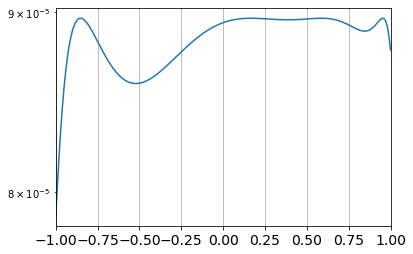

In [35]:
mu2 = functions.SBQ_X(kernel=kern, X=mu1, opt_restarts=restarts, return_plot=True) # 4 nodes

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01]


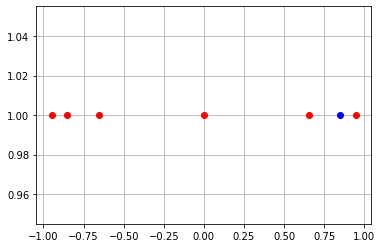

In [36]:
print(mu2)

plt.figure()
plt.grid()
plt.plot(mu2[0:(existing_NoN + 1)], 1*np.ones(len(mu2) - 1), 'ro')
plt.plot(mu2[(existing_NoN + 1)], 1, 'bo')
plt.show()

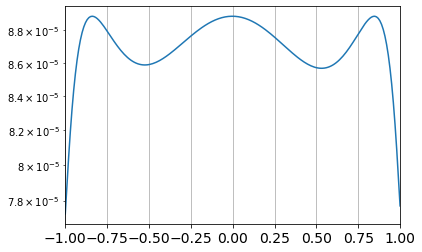

In [37]:
mu3 = functions.SBQ_X(kernel=kern, X=mu2, opt_restarts=restarts, return_plot=True) # 5 nodes

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01]


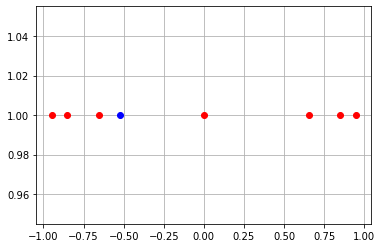

In [38]:
print(mu3)

plt.figure()
plt.grid()
plt.plot(mu3[0:(existing_NoN + 2)], 1*np.ones(len(mu3) - 1), 'ro')
plt.plot(mu3[(existing_NoN + 2)], 1, 'bo')
plt.show()

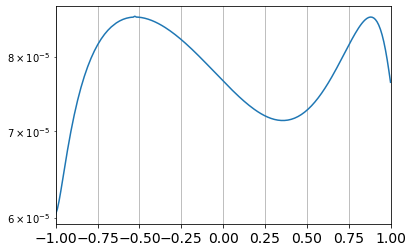

In [47]:
mu4 = functions.SBQ_X(kernel=kern, X=mu3, opt_restarts=restarts, return_plot=True) # 6 nodes

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01
  3.56654675e-01]


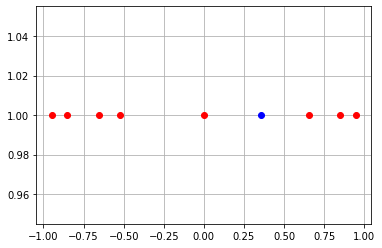

In [48]:
print(mu4)

plt.figure()
plt.grid()
plt.plot(mu4[0:(existing_NoN + 3)], 1*np.ones(len(mu4) - 1), 'ro')
plt.plot(mu4[(existing_NoN + 3)], 1, 'bo')
plt.show()

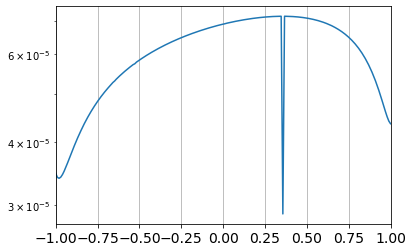

 C:\Users\Manuel Kleinschmager\PycharmProjects\GaussianProcessQuadrature\functions.py:529: IntegrationWarning:The integral is probably divergent, or slowly convergent.


In [49]:
mu5 = functions.SBQ_X(kernel=kern, X=mu4, opt_restarts=restarts, return_plot=True) # 7 nodes

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01
  3.56654675e-01 -9.81224695e-01]


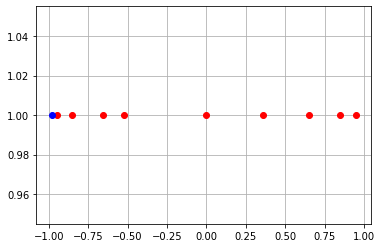

In [50]:
print(mu5)

plt.figure()
plt.grid()
plt.plot(mu5[0:(existing_NoN + 4)], 1*np.ones(len(mu5) - 1), 'ro')
plt.plot(mu5[(existing_NoN + 4)], 1, 'bo')
plt.show()

In [51]:
print(mu1)
print(mu2)
print(mu3)
print(mu4)
print(mu5)

[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01]
[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01]
[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01]
[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01
  3.56654675e-01]
[ 6.52842307e-01  9.48810736e-01 -9.48813725e-01 -3.69564363e-05
 -6.52879141e-01 -8.51950374e-01  8.46201264e-01 -5.24940065e-01
  3.56654675e-01 -9.81224695e-01]


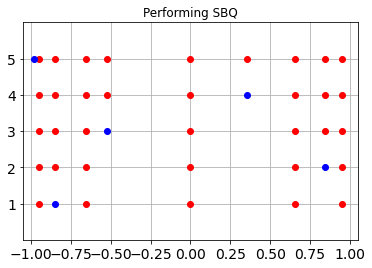

In [52]:
plt.figure()
plt.grid()
plt.ylim(0, 6)
plt.title('Performing SBQ')
plt.xticks(fontsize=14)
plt.yticks(np.array([1, 2, 3, 4, 5]), fontsize=14)
plt.xlim(-1.05,1.05)

#3 nodes
plt.plot(mu1[0:existing_NoN], 1*np.ones(len(mu1) - 1), 'ro')
plt.plot(mu1[existing_NoN], 1, 'bo')

#4 nodes
plt.plot(mu2[0:(existing_NoN + 1)], 2*np.ones(len(mu2) - 1), 'ro')
plt.plot(mu2[(existing_NoN + 1)], 2, 'bo')

#5 nodes
plt.plot(mu3[0:(existing_NoN + 2)], 3*np.ones(len(mu3) - 1), 'ro')
plt.plot(mu3[(existing_NoN + 2)], 3, 'bo')

#6 nodes
plt.plot(mu4[0:(existing_NoN + 3)], 4*np.ones(len(mu4) - 1), 'ro')
plt.plot(mu4[(existing_NoN + 3)], 4, 'bo')

#7 nodes
plt.plot(mu5[0:(existing_NoN + 4)], 5*np.ones(len(mu5) - 1), 'ro')
plt.plot(mu5[(existing_NoN + 4)], 5, 'bo')

plt.show()